De relaciones lineales a computer vision.

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
#mnist de moda
#cargar el dataset
mnist = tf.keras.datasets.fashion_mnist

In [ ]:
dir(mnist)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'load_data']

In [ ]:
#leer los datos, cargar
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
#sanity check
#Vamos a ver que tenemos en train_images y en train_labels

print(train_labels[0])

9


In [ ]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

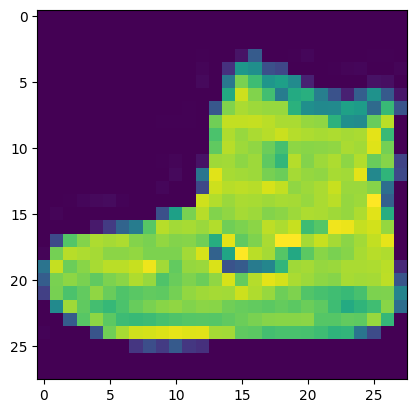

In [ ]:
plt.imshow(train_images[0])

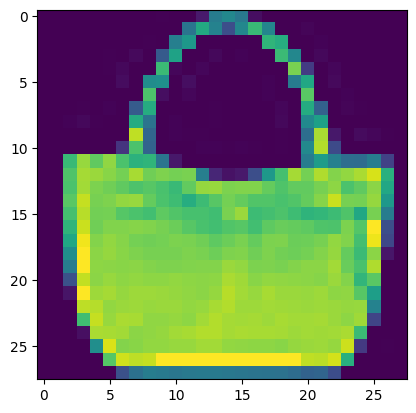

In [ ]:
plt.imshow(train_images[100])

In [ ]:
#Dado que nuestra red funciona mejopr entre 0 y 1
#Vamos a normalizar

train_images = train_images/255
test_images = test_images/255


In [ ]:
train_images

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
#Vamos a construir nuestro lego
#ojo !! Coasas que vamos a aprender
#Se lo vamos a aplanar
#OJO !!! EN la última capa el número de neuronas que quiero clasificar
#Softmax => siempre para clasificación en la última capa, representa probabilidades

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [1]:
#Ok, ya tenemos nuestros datos
#Ok, ya tenemos nuestra red
#¿Qué nos falta?

model.compile(loss="sparse_categorical_crossentropy", optimizer = "adam", metrics=['accuracy'])

NameError: ignored

In [ ]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4059 - accuracy: 0.8566
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3534 - accuracy: 0.8723
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3244 - accuracy: 0.8808
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3043 - accuracy: 0.8881
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2881 - accuracy: 0.8934


In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.4293 - accuracy: 0.8416


[0.42925626039505005, 0.8416000008583069]

In [ ]:
#Ejercicio 1
# Vamos a ver las probabilidades de que pertenezca a una clase o a otra
clasificaciones = model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [ ]:
clasificaciones[11][5]

0.9998338

In [ ]:
test_labels[11]

5

In [ ]:
#prueba lo mismo con 512 neuronas

In [ ]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(512, activation = "relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model2.compile(loss="sparse_categorical_crossentropy", optimizer = "adam", metrics=['accuracy'])

In [ ]:
model2.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 14s 6ms/step - loss: 0.4729 - accuracy: 0.8302
Epoch 2/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3585 - accuracy: 0.8689
Epoch 3/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3257 - accuracy: 0.8801
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2993 - accuracy: 0.8901
Epoch 5/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2811 - accuracy: 0.8959


In [ ]:
model2.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3740 - accuracy: 0.8658


[0.37399083375930786, 0.8658000230789185]

In [ ]:
clasificaciones = model2.predict(test_images)

313/313 [==============================] - 1s 4ms/step


In [ ]:
#¿Puedo eliminar la capa flatten?
#¿Puedes poner otra capa intermedia? ¿ Mejora mucho ?
#Prueba a NO normalizar los datos

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(512, activation = "relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model3.compile(loss="sparse_categorical_crossentropy", optimizer = "adam", metrics=['accuracy'])

In [ ]:
model3.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.4879 - accuracy: 0.8381


[0.4878537654876709, 0.838100016117096]

In [ ]:
model4 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(512, activation = "relu"),
    tf.keras.layers.Dense(512, activation = "relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model4.compile(loss="sparse_categorical_crossentropy", optimizer = "adam", metrics=['accuracy'])

In [ ]:
model4.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 18s 9ms/step - loss: 2.0945 - accuracy: 0.7450
Epoch 2/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.6364 - accuracy: 0.7924
Epoch 3/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.5510 - accuracy: 0.8141
Epoch 4/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4709 - accuracy: 0.8360
Epoch 5/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4350 - accuracy: 0.8469


In [ ]:
model4.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.4598 - accuracy: 0.8416


[0.45984795689582825, 0.8416000008583069]